# Applied ML Project 1: Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Boston Dataset

## 1. Context

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

#### Attribute Information

Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

Source: StatLib - Carnegie Mellon University

## 2. Load & clean data

In [3]:
# load boston.csv into a pandas dataframe
df_b = pd.read_csv('../data/boston/boston.csv')

In [4]:
# remove the feature 'B' for ethical issues
# NOTE: column B is the proportion of black people by town
df_b = df_b.drop('B', axis=1)

# get rid of null values
df_b = df_b.dropna()

## 3. Explore Data

### 3.1 Basic Information

In [5]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [6]:
# compute basic statistics
df_b.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 3.2 Univariate analysis: Target

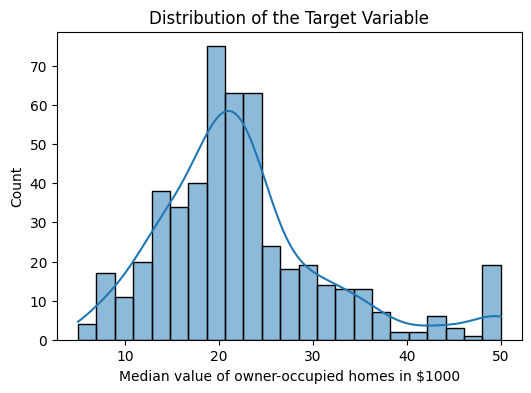

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(df_b['MEDV'], kde=True)
plt.title('Distribution of the Target Variable')
plt.xlabel('Median value of owner-occupied homes in $1000')
plt.show()

### 3.3 Univariate analysis: Features

In [8]:
# plot histograms of feature class distributions
df_b.drop('MEDV', axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# output values of single feature
df_b['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

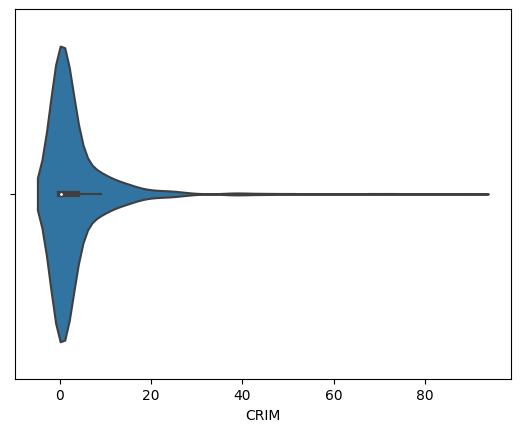

In [ ]:
# plot violin plots of class distributions
# fig, ax = plt.subplots(figsize=(20,15))
# sns.violinplot(data=df_b, ax=ax)
# plt.show()

sns.violinplot(x='CRIM', data=df_b)
plt.show()

### 3.4 Bivariate analysis: Feature vs Target

#### 3.4.1 Scatter Plots

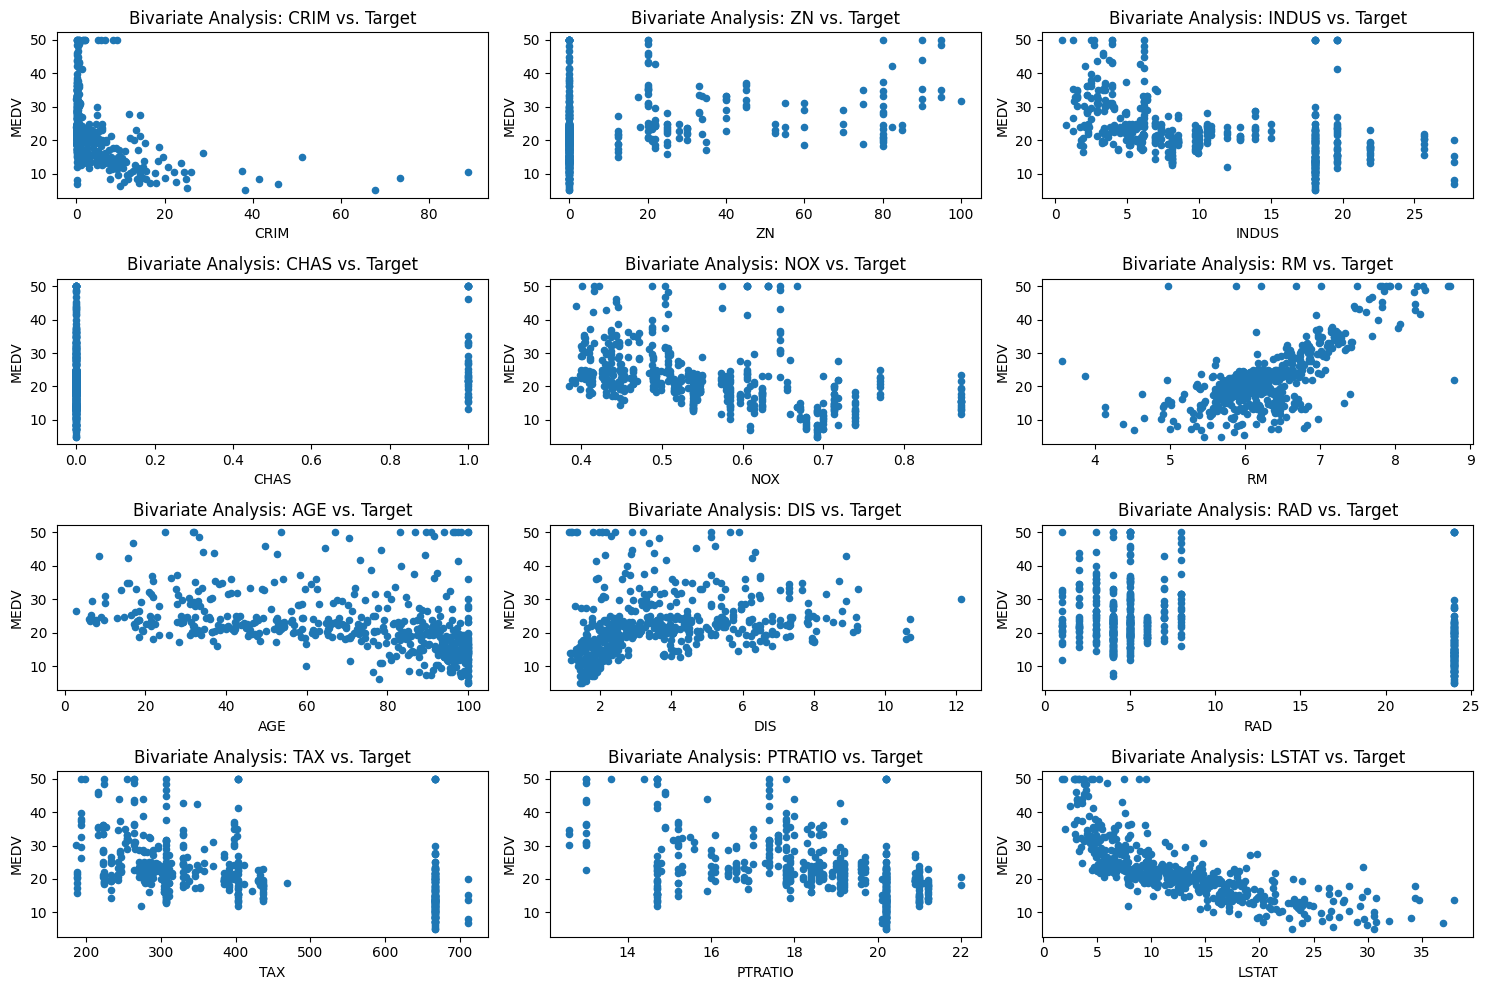

In [ ]:
# for all features vs target
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(df_b.columns[:-1]):  
    df_b.plot.scatter(x=feature, y='MEDV', ax=axs[i])
    axs[i].set_title(f'Bivariate Analysis: {feature} vs. Target')

plt.tight_layout()
plt.show()

#### 3.4.2 Correlation analysis

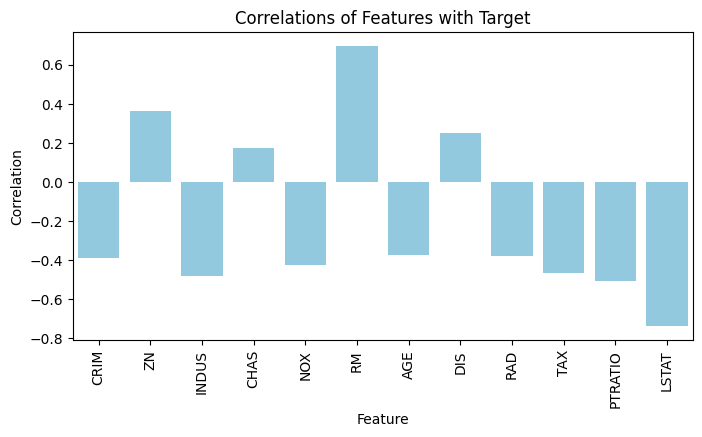

In [ ]:
# correlation of features with targets
correlations = df_b.drop('MEDV', axis=1).corrwith(df_b['MEDV'])

plt.figure(figsize=(8, 4))
sns.barplot(x=correlations.index, y=correlations, color='skyblue')
plt.title('Correlations of Features with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(correlations)


CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64


### 3.5 Bivariate analysis: Features

#### 3.5.1 Scatter Plots

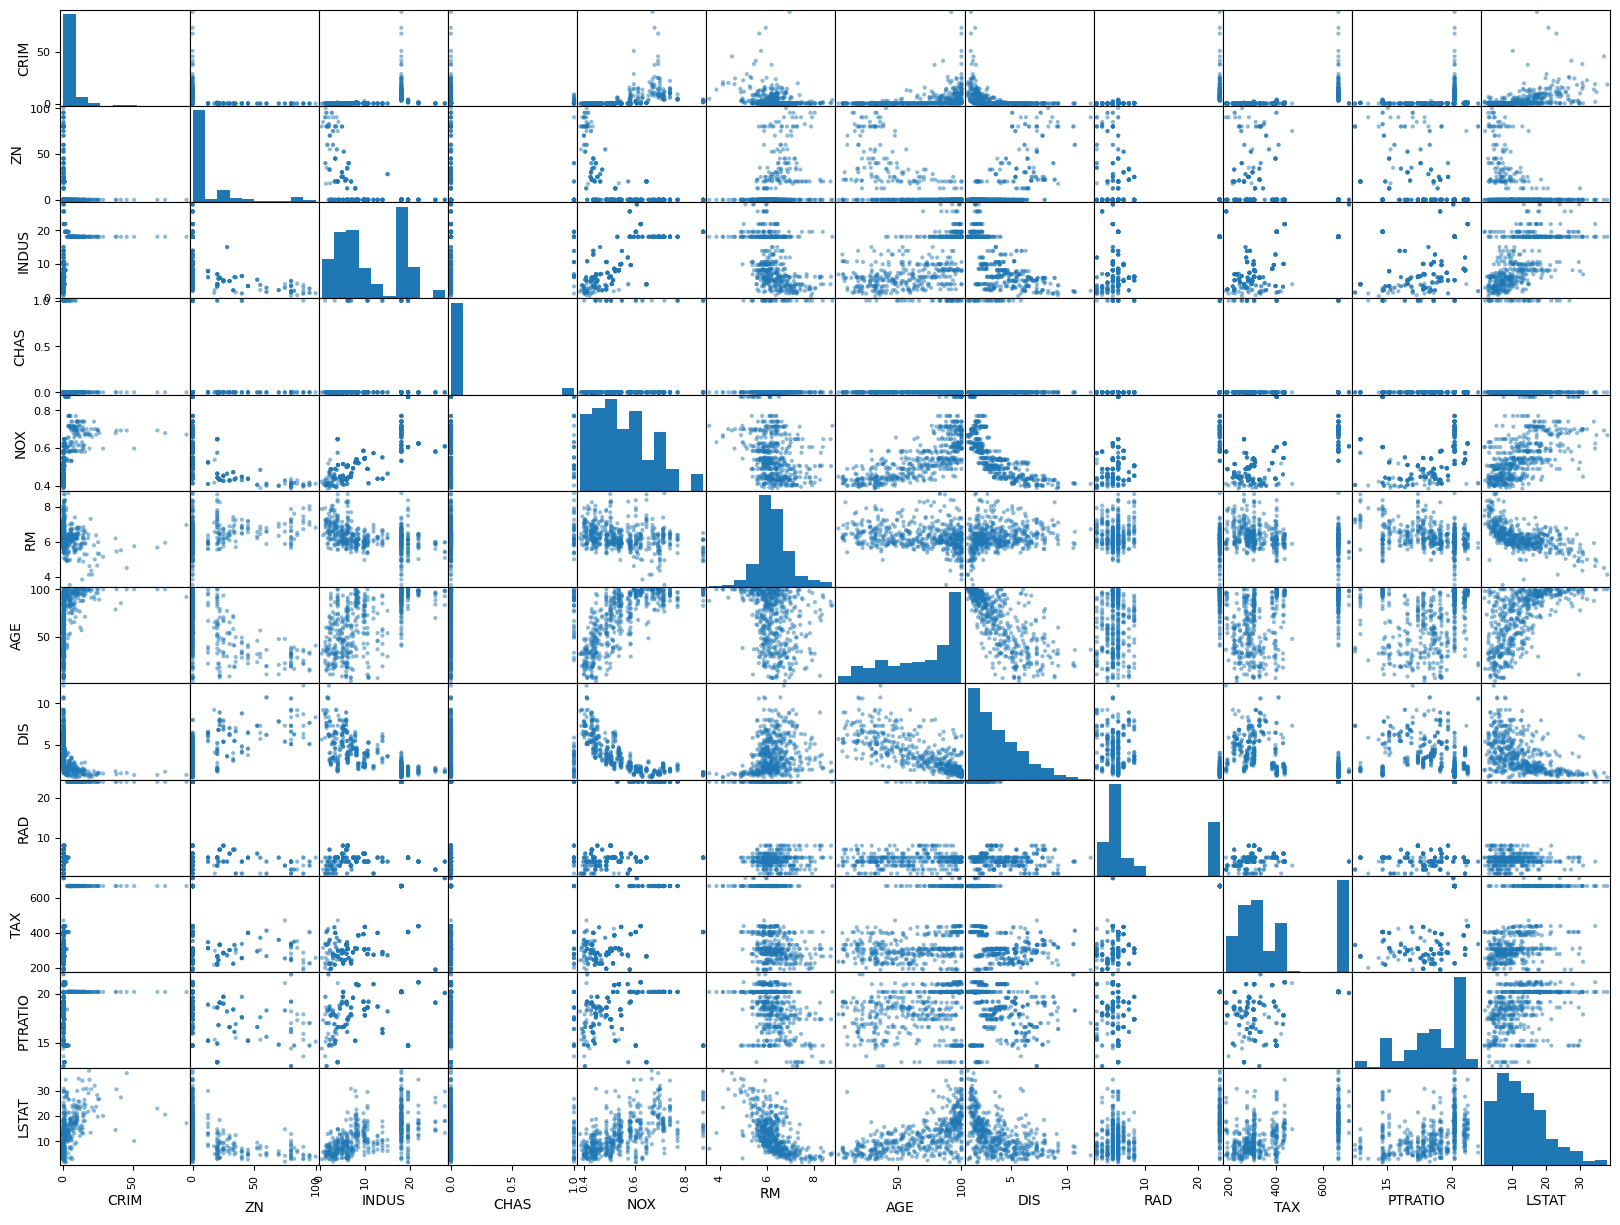

In [ ]:
# for all features
from pandas.plotting import scatter_matrix
scatter_matrix(df_b.drop('MEDV', axis=1), figsize=(20,15))
plt.show()

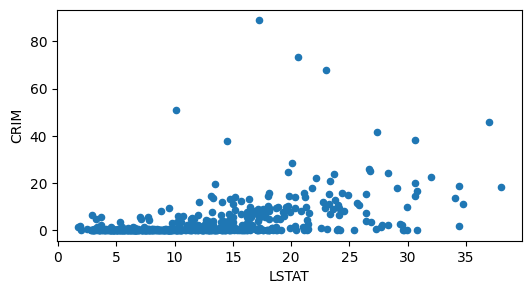

In [ ]:
# for two features
df_b.plot.scatter(x='LSTAT', y='CRIM', figsize=(6, 3))
plt.show()

#### 3.5.2 Correlation

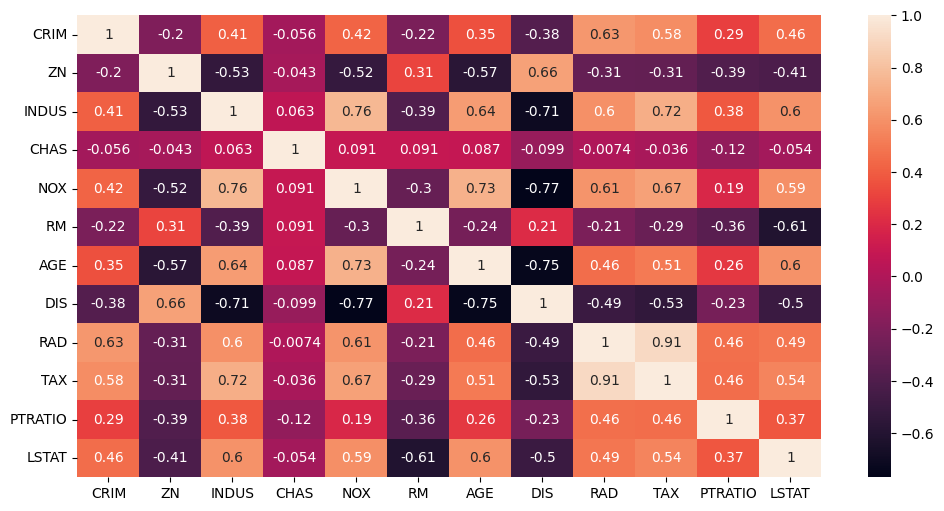

In [ ]:
# correlation matrix for all features
corr_matrix = df_b.drop('MEDV', axis=1).corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
print(f"Mean of feature correleations: {corr_matrix.mean().mean().round(2)}")
print(f"Median of feature correleations: {corr_matrix.median().median().round(2)}")

Mean of feature correleations: 0.16
Median of feature correleations: 0.39


## 4. Data Analysis Summary

**Univariate Analysis: Target**
- quite normally distributed with a few spikes
- significant spike around the $50,000 mark

**Univariate Analysis: Features**
- many features heavily disbalanced
- e.g. CHAS
  - Houses not bounding the Charles River: 471
  - Houses bounding the Charles River: 35
- some also quite normally distributed (e.g. RM)
- general pattern: normal distribution in small part but then spikes at maximum values
- wide variation in features like CRIM, TAX, and LSTAT suggests that there are significant disparities between different areas in the dataset.

**Bivariate Analyis: Features vs Target**
- only 4 features influence target variable MEDV in a positive way (ZN, CHAS, RM, DIS)
- RM has highest correlation with MEDV (0.7) and LSTAT the lowest (-0.74)
- Rest of features with negative correlation are around -0.4

**Bivariate Analysis: Features**
- many features are highly correlated with each other
- highest positive correlation: TAX & RAD (0.91)
- highest negative correlation: DIS & NOX (-0.77)
- Mean (0.16) and Median (0.39) of correlations indicate that features are rather positively correlated

**Ethical Concerns**
- feature 'B' represents the proportion of Black residents by town
- poses significant ethical concerns and can create biases, especially if used without consideration of the broader societal impacts
- also, the data might not be representative of the Boston housing market, which can lead to biased conclusions
- privacy concerns: risk of de-anonymizing the data


# Wine Dataset

## Load & clean data

In [ ]:
# TODO